In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn import datasets, manifold
import mpl_toolkits.mplot3d  # noqa: F401
from matplotlib import ticker
from sklearn.manifold import Isomap, MDS, LocallyLinearEmbedding, TSNE
sr_points, sr_color = datasets.make_swiss_roll(n_samples=500, random_state=0)
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

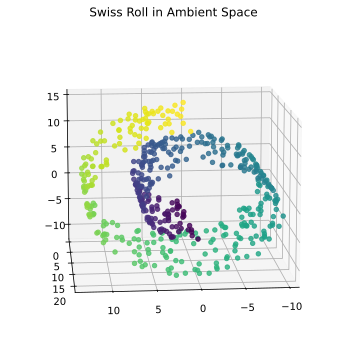

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=20, alpha=0.8, cmap='viridis'
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=85, elev=12)

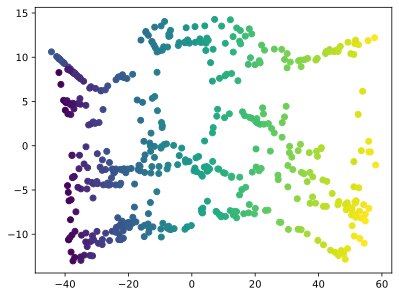

In [34]:
isomap = Isomap(n_components=2)
X_transformed = isomap.fit_transform(sr_points)
fig, plot = plt.subplots()
plt.prism()
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=sr_color, cmap='viridis')

/Users/cjschan/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


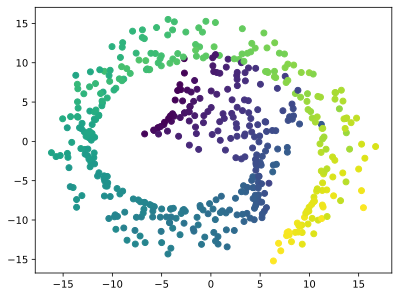

In [36]:
mds = MDS(n_components=2)
X_transformed = mds.fit_transform(sr_points)
fig, plot = plt.subplots()
plt.prism()
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=sr_color, cmap='viridis')

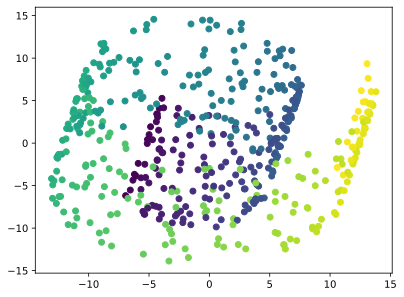

In [38]:
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(sr_points)
fig, plot = plt.subplots()
plt.prism()
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=sr_color, cmap='viridis')

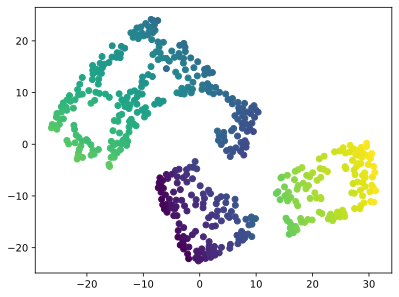

In [42]:
tsne = TSNE(n_components=2)
X_transformed = tsne.fit_transform(sr_points)
fig, plot = plt.subplots()
plt.prism()
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=sr_color, cmap='viridis')

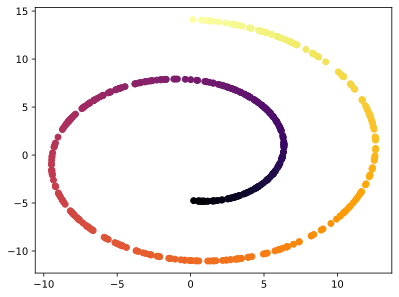

In [7]:
plt.scatter(pd.DataFrame(sr_points)[[0]], pd.DataFrame(sr_points)[[2]],c=sr_color, cmap='inferno')

In [8]:
sr_color

array([ 9.8848344 , 11.45288996, 10.39329996,  9.84779199,  8.7052414 ,
       10.79979758,  8.83655129, 13.1171515 , 13.79469653,  8.32624016,
       12.17422167,  9.69710616, 10.06608284, 13.43593178,  5.38188806,
        5.53356328,  4.90294289, 12.55964615, 12.04634358, 12.9120603 ,
       13.93564956, 12.244281  ,  9.0617295 , 12.06870316,  5.82709918,
       10.74350252,  6.06346188, 13.61568377,  9.63069354,  8.62048569,
        7.20576688, 12.00936959,  9.01150458, 10.06975273,  4.88947868,
       10.5334664 , 10.48125526, 10.52685492, 13.60700507, 11.13839391,
        8.10067112,  8.83131811, 11.2874081 ,  5.28000068, 10.99651723,
       11.03300199,  6.69519791,  5.92749071,  7.68523115,  8.14028224,
       10.08636694,  8.84611086, 14.02759295,  5.67413866,  6.68100603,
        6.23269537, 10.86778993,  7.09960609,  9.10726448,  7.01604591,
        6.21064201,  5.75265018, 10.89814963,  6.01473261,  6.56513409,
        8.18754184, 12.45006788,  5.62754694, 12.60983368,  5.61

In [9]:
len(sr_color)

500

In [10]:
S_points, S_color = datasets.make_s_curve(n_samples=1500, random_state=0)

NameError: name 's_points' is not defined

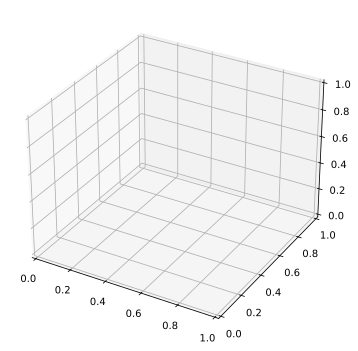

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    s_points[:, 0], s_points[:, 1], sr_points[:, 2], c=s_color, s=50, alpha=0.8, cmap='viridis'
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-60, elev=20)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

In [ ]:
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(S_points, S_color, "Original S-curve samples")

In [ ]:
fig = plt.figure(figsize=(8, 6))
# Creating dataset
z = 4 * np.tan(np.random.randint(10, size =(1500))) + np.random.randint(100, size =(1500))
x = 4 * np.cos(z) + np.random.normal(size = 1500)
y = 4 * np.sin(z) + 4 * np.random.normal(size = 1500)
 
# Creating figure
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines  
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    c = (x + y + z), 
                    cmap = 'viridis', s=50, alpha=0.8,)
ax.view_init(azim=-20, elev=12) 
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [ ]:
fig = plt.figure(figsize=(8, 6))
# Creating dataset
z = 2 * np.tan(np.random.randint(10, size =(1500)))
x = 2 * np.cos(z) + np.random.normal(size = 1500)
y = 2 * np.sin(z) + np.random.normal(size = 1500)
 
# Creating figure
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines  
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    c = (x + y + z), 
                    cmap = 'viridis', s=50, alpha=0.8,)
ax.view_init(azim=20, elev=22) 
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.manifold import Isomap
from sklearn.utils import shuffle
from sklearn.datasets import load_digits

#use all digits
#mnist = fetch_mldata('MNIST original')
mnist = load_digits()
mytargets = list(range(0,10))
#mytargets = [1,7]
XX_train, yy_train = mnist.data / 255., mnist.target
X_train=[]
y_train=[]
for i, label in enumerate(yy_train):
    if label in mytargets:
        X_train.append(XX_train[i])
        y_train.append(yy_train[i])
num_samples_to_plot = 5000
X_train, y_train = shuffle(X_train, y_train)
X_train, y_train = X_train[:num_samples_to_plot], y_train[:num_samples_to_plot]  # lets subsample a bit for a first impression

for digit in mytargets:
    instances=[i for i in y_train if i==digit]

transformer = Isomap(n_neighbors = 10, n_components = 2)
fig, plot = plt.subplots()
plt.prism()

X_transformed = transformer.fit_transform(X_train)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train, cmap='viridis')
#plot.set_xticks(())
#plot.set_yticks(())

count=0;
plt.tight_layout()

for label , x, y in zip(y_train, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
    if count % 200 == 0:
        plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=10,bbox=dict(boxstyle='round4,pad=.5', fc='0.8'))
    count = count + 1
plt.savefig('mnist_pca.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.manifold import Isomap
from sklearn.utils import shuffle
from sklearn.datasets import load_digits

#use all digits
#mnist = fetch_mldata('MNIST original')
mnist = load_digits()
mytargets = list(range(0,10))
#mytargets = [1,7]
XX_train, yy_train = mnist.data / 255., mnist.target
X_train=[]
y_train=[]
for i, label in enumerate(yy_train):
    if label in mytargets:
        X_train.append(XX_train[i])
        y_train.append(yy_train[i])
num_samples_to_plot = 5000
X_train, y_train = shuffle(X_train, y_train)
X_train, y_train = X_train[:num_samples_to_plot], y_train[:num_samples_to_plot]  # lets subsample a bit for a first impression

for digit in mytargets:
    instances=[i for i in y_train if i==digit]


pca = PCA(n_components=2)
fig, plot = plt.subplots()
plt.prism()

X_transformed = pca.fit_transform(X_train)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train, cmap='viridis')


count=0;
plt.tight_layout()

for label , x, y in zip(y_train, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
    if count % 200 == 0:
        plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=10,bbox=dict(boxstyle='round4,pad=.5', fc='0.8'))
    count = count + 1
#plt.savefig('mnist_pca.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.utils import shuffle
from sklearn.datasets import load_digits

#use all digits
#mnist = fetch_mldata('MNIST original')
mnist = load_digits()
mytargets = list(range(0,10))
#mytargets = [1,7]
XX_train, yy_train = mnist.data / 255., mnist.target
X_train=[]
y_train=[]
for i, label in enumerate(yy_train):
    if label in mytargets:
        X_train.append(XX_train[i])
        y_train.append(yy_train[i])
num_samples_to_plot = 5000
X_train, y_train = shuffle(X_train, y_train)
X_train, y_train = X_train[:num_samples_to_plot], y_train[:num_samples_to_plot]  # lets subsample a bit for a first impression

for digit in mytargets:
    instances=[i for i in y_train if i==digit]


mds = MDS(n_components=2)
fig, plot = plt.subplots()
plt.prism()

X_transformed = mds.fit_transform(X_train)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train, cmap='viridis')


count=0;
plt.tight_layout()

for label , x, y in zip(y_train, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
    if count % 200 == 0:
        plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=10,bbox=dict(boxstyle='round4,pad=.5', fc='0.8'))
    count = count + 1
#plt.savefig('mnist_pca.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.manifold import Isomap
from sklearn.utils import shuffle
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.datasets import load_digits

#use all digits
#mnist = fetch_mldata('MNIST original')
mnist = load_digits()
mytargets = list(range(0,10))
#mytargets = [1,7]
XX_train, yy_train = mnist.data / 255., mnist.target
X_train=[]
y_train=[]
for i, label in enumerate(yy_train):
    if label in mytargets:
        X_train.append(XX_train[i])
        y_train.append(yy_train[i])
num_samples_to_plot = 5000
X_train, y_train = shuffle(X_train, y_train)
X_train, y_train = X_train[:num_samples_to_plot], y_train[:num_samples_to_plot]  # lets subsample a bit for a first impression

for digit in mytargets:
    instances=[i for i in y_train if i==digit]


transformer = LocallyLinearEmbedding(n_neighbors = 10, n_components = 2,
                                     eigen_solver='auto', method='standard')
fig, plot = plt.subplots()
plt.prism()

#X_transformed = transformer.fit_transform(X_train)
#plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train, cmap='viridis')


#count=0;
#plt.tight_layout()
type(y_train)
#for label , x, y in zip(y_train, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
#    if count % 200 == 0:
#        plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=10,bbox=dict(boxstyle='round4,pad=.5', fc='0.8'))
#    count = count + 1
#plt.savefig('mnist_pca.png')
#plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.manifold import Isomap
from sklearn.utils import shuffle
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

#use all digits
#mnist = fetch_mldata('MNIST original')
mnist = load_digits()
mytargets = list(range(0,10))
#mytargets = [1,7]
XX_train, yy_train = mnist.data / 255., mnist.target
X_train=[]
y_train=[]
for i, label in enumerate(yy_train):
    if label in mytargets:
        X_train.append(XX_train[i])
        y_train.append(yy_train[i])
num_samples_to_plot = 5000
X_train, y_train = shuffle(X_train, y_train)
X_train, y_train = X_train[:num_samples_to_plot], y_train[:num_samples_to_plot]  # lets subsample a bit for a first impression

for digit in mytargets:
    instances=[i for i in y_train if i==digit]


transformer = TSNE(n_components = 2, random_state=123)
fig, plot = plt.subplots()
plt.prism()

X_transformed = transformer.fit_transform(X_train)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train, cmap='viridis')


count=0;
plt.tight_layout()

for label , x, y in zip(y_train, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
    if count % 50 == 0:
        plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=10,bbox=dict(boxstyle='square,pad=.5', fc='0.8'))
    count = count + 1
#plt.savefig('mnist_pca.png')
plt.show()

In [ ]:
X = pd.DataFrame([[0,1,0],[1,0,1],[0,1,1],[1,1,0]],columns=['X1','X2','X3'], index=['a','b','c','d'])

In [ ]:
X

In [ ]:
X.iloc[:,0]

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2],s=60,c=[1,2,3,4],cmap='viridis')
ax.view_init(azim=-40, elev=12) 
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$X_3a$')
ax.grid(False)


In [ ]:
mds = MDS(n_components=2)
fig, plot = plt.subplots(figsize=(6,6))
plt.figure(figsize=(6,6))
plt.prism()

X_transformed = mds.fit_transform(X)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1],c=[1,2,3,4],cmap='viridis',s=100)

In [ ]:
pd.DataFrame(mds.dissimilarity_matrix_, columns=['a','b','c','d'], index=['a','b','c','d'])

In [ ]:
pd.DataFrame(mds.embedding_)

In [ ]:
mds.stress_

In [ ]:
np.sqrt((0.5435211+1.22690771)**2 + (-0.61824124+0.37519982)**2)

In [ ]:
(1.732051-1.7870331007325053)

In [ ]:
np.sqrt((0.5435211-0.01244668)**2 + (-0.61824124-0.15886925)**2)

In [ ]:
(1-0.9412442580150895)

In [ ]:
np.sqrt((0.5435211-0.67093993)**2 + (-0.61824124-0.83457181)**2)

In [ ]:
(1.4583899740771915-1.414214)

In [ ]:
np.sqrt((-1.22690771-0.01244668)**2 + (-0.37519982-0.15886925)**2)

In [ ]:
(1.414214-1.3495292051463492)

In [ ]:
from scipy.spatial import distance_matrix

In [ ]:
X.index = ['a','c','d','b']
X

In [ ]:
mds.embedding_

In [ ]:
from scipy.spatial.distance import pdist

In [ ]:
pdist(mds.embedding_)

In [ ]:
pd.DataFrame(mds.dissimilarity_matrix_, columns=['a','c','d','b'], index=['a','c','d','b'])

In [ ]:
pd.DataFrame([[0,1.79283569,0.96238197,0.95476113],[1.79283569,0,1.39032335,1.36906657],[0.96238197,1.39032335,0,1.45900131],[0.95476113,1.36906657,1.45900131,0]], columns=['a','c','d','b'], index=['a','c','d','b'])